In [1]:
import pandas as pd

# Load the Excel file and sheet
df = pd.read_excel('C:\\paper\\empirical_analysis\\data\\RQ2\\coevolution_taxonomy.xlsx', sheet_name='rater_1')

# Check the first few rows to ensure data is loaded correctly
print(df.head())

             gitauthor        projectname  \
0          Madhava Jay   OpenMined/PySyft   
1          Madhava Jay   OpenMined/PySyft   
2            rasswanth   OpenMined/PySyft   
3   Mercè Martín Prats    bigmlcom/python   
4  Guillaume Chevalier  Neuraxio/Neuraxle   

                                   commitid  \
0  1a9da6a992f66722699a691a773cfb8102a8e428   
1  a2766fded2e3c29f728be76777732799a76d6343   
2  9d37ca9fe64ad8d15daee2a1c6836013e4aa4b07   
3  530d4ec3a64975a9c81c4b36b1cced7dce0e1f91   
4  429cef9bc909d0c1daea2fa4742b60514f17722e   

                                       commitmessage  \
0  Merge pull request #8553 from OpenMined/yash/f...   
1      Merge branch 'dev' into fix-ui/domain-profile   
2        Merge branch 'dev' into celery_clear_script   
3  Fixing SupervisedModel class and improving tes...   
4  Merge pull request #511 from Kimoby/update-new...   

                                  lsof_modifiedfiles  \
0  .github/workflows/pr-tests-stack.yml, .github/... 

In [2]:
import ast
from collections import Counter

# Function to parse the categories from string
def parse_categories(category_string):
    try:
        categories_list = ast.literal_eval(category_string.lower())
        categories_list = list(set(categories_list))  # Remove duplicates
        sorted_categories = sorted(categories_list)
        return sorted_categories
    except (SyntaxError, ValueError):
        print(f"Error parsing: {category_string}")
        return []

# Apply the parse function and explode to get a long format
df['ParsedCategories'] = df['Categories'].apply(parse_categories)
categories_lists = df['ParsedCategories'].explode()

# Count occurrences of each category
category_counts = Counter(categories_lists)

# Convert the counts into a sorted dictionary
category_frequency_dict = dict(category_counts)
category_frequency_dict = {k: v for k, v in sorted(category_frequency_dict.items(), key=lambda item: item[1], reverse=True)}

# Print the sorted category frequencies
for category, count in category_frequency_dict.items():
    print(f"{category}: {count}")


pipeline automation: 354
testing: 290
feature development: 188
documentation: 132
dependency management: 124
bug fixing: 81
code cleanup: 61
integration: 54
refactoring: 35
deployment: 34
model training: 13
performance optimization: 11
security: 9
model and data versioning: 4


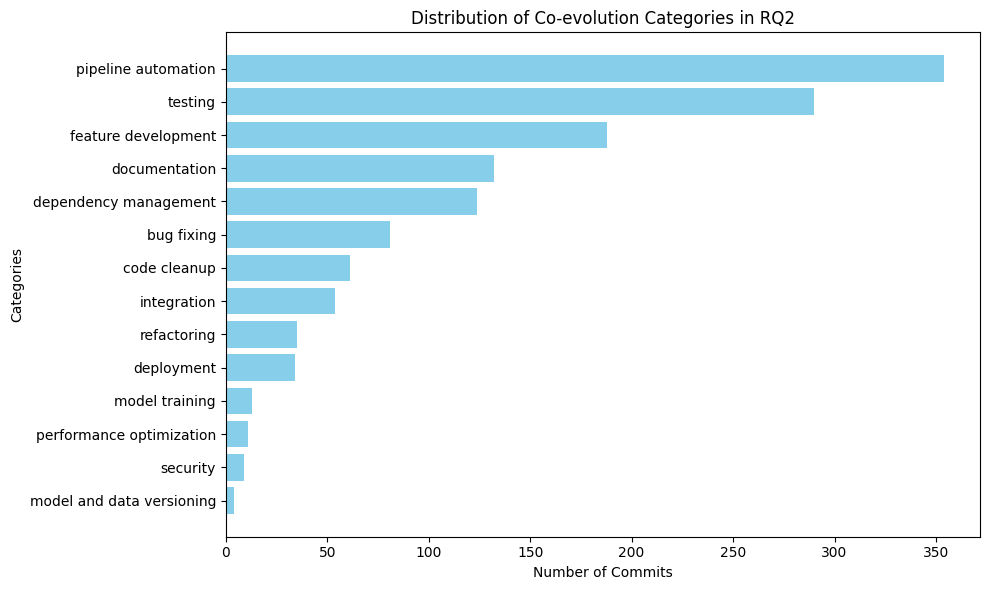

In [3]:
import matplotlib.pyplot as plt

# Extract category names and counts
categories = list(category_frequency_dict.keys())
counts = list(category_frequency_dict.values())

# Plot the bar chart
plt.figure(figsize=(10, 6))
plt.barh(categories, counts, color='skyblue')
plt.xlabel('Number of Commits')
plt.ylabel('Categories')
plt.title('Distribution of Co-evolution Categories in RQ2')
plt.gca().invert_yaxis()  # Invert y-axis to display the highest count on top
plt.tight_layout()

# Save the plot as a PNG file and show it
plt.savefig('rq2_category_distribution.png')
plt.show()


In [4]:
from mlxtend.frequent_patterns import apriori, association_rules
from mlxtend.preprocessing import TransactionEncoder

# Prepare the data for Association Rule Mining
te = TransactionEncoder()
te_ary = te.fit(categories_lists).transform(categories_lists)
df_te = pd.DataFrame(te_ary, columns=te.columns_)

# Apply Apriori algorithm to generate frequent itemsets
frequent_itemsets = apriori(df_te, min_support=0.1, use_colnames=True)

# Generate association rules
rules = association_rules(frequent_itemsets, metric="confidence", min_threshold=0.6)

# Sort the rules by support and confidence
sorted_rules = rules.sort_values(['support', 'confidence'], ascending=False)

# Print the top 5 association rules
print(sorted_rules.head())


     antecedents consequents  antecedent support  consequent support  \
67           (e)         (n)            0.941727            0.993525   
66           (n)         (e)            0.993525            0.941727   
73           (t)         (e)            0.897842            0.941727   
74           (e)         (t)            0.941727            0.897842   
1214      (t, n)         (e)            0.891367            0.941727   

       support  confidence      lift  leverage  conviction  zhangs_metric  
67    0.935252    0.993125  0.999597 -0.000377    0.941727      -0.006875  
66    0.935252    0.941347  0.999597 -0.000377    0.993525      -0.058653  
73    0.897842    1.000000  1.061879  0.052320         inf       0.570423  
74    0.897842    0.953400  1.061879  0.052320    2.192216       1.000000  
1214  0.891367    1.000000  1.061879  0.051943         inf       0.536424  
